In [1]:
import numpy as np ; import pandas as pd ; import matplotlib.pyplot as plt ; import seaborn as sns

In [ ]:
data = pd.read_csv('./data/WA_Fn-UseC_-Telco-Customer-Churn.csv')

data.shape

In [34]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0-12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,24-48
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0-12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,24-48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0-12


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
Churn,7043.0,0.265370,0.441561,0.00,0.0,0.00,1.00,1.00


In [8]:
data.isnull().sum() # No missing values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
data['Churn'].value_counts() # Imbalanced dataset


In [11]:
#Leables encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['Churn'] = le.fit_transform(data['Churn']) # 

data['Churn'].value_counts()

    

Churn
0    5174
1    1869
Name: count, dtype: int64

In [ ]:
# Data Preprocessing

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

data['TotalCharges'].isnull().sum()

data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())

data['TotalCharges'].isnull().sum()


In [ ]:
# Feature Selection

data = data.drop(['customerID'], axis=1)

data.shape


In [26]:
# Feature Engineering

data['tenure_group'] = pd.cut(data['tenure'], bins=[0, 12, 24, 48, 60, 72], labels=['0-12', '12-24', '24-48', '48-60', '60-72']) # Binning

data['tenure_group'].value_counts()



tenure_group
0-12     2175
24-48    1594
60-72    1407
12-24    1024
48-60     832
Name: count, dtype: int64

In [ ]:
# Data Visualization

sns.countplot(data['Churn'])


C:\Users\firat\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\firat\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


AttributeError: 'numpy.int64' object has no attribute 'startswith'

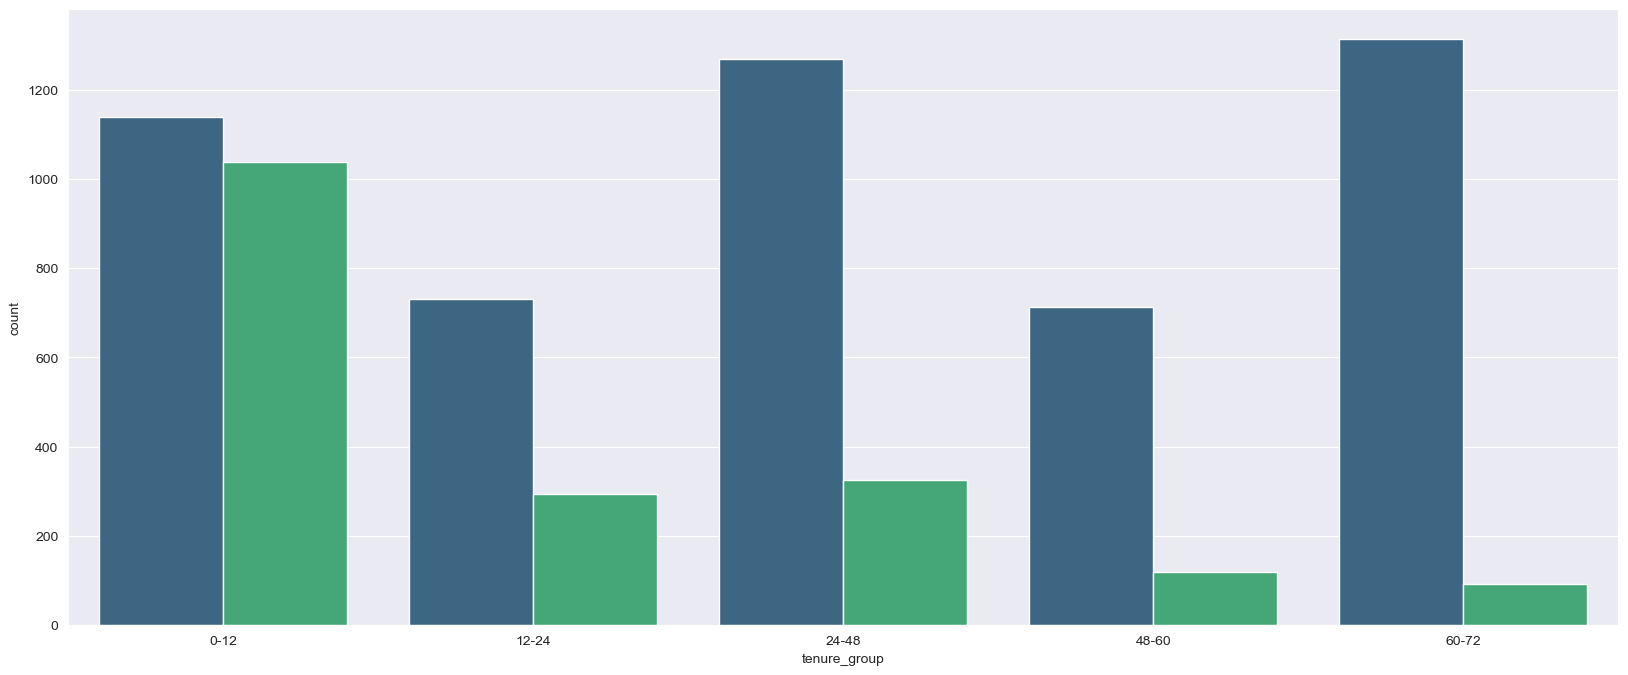

In [27]:
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='tenure_group', hue='Churn', palette='viridis', order=['0-12', '12-24', '24-48', '48-60', '60-72']) 

# This plot shows that the customers who have been with the company for less than 12 months are more likely to churn.


AttributeError: 'numpy.int64' object has no attribute 'startswith'

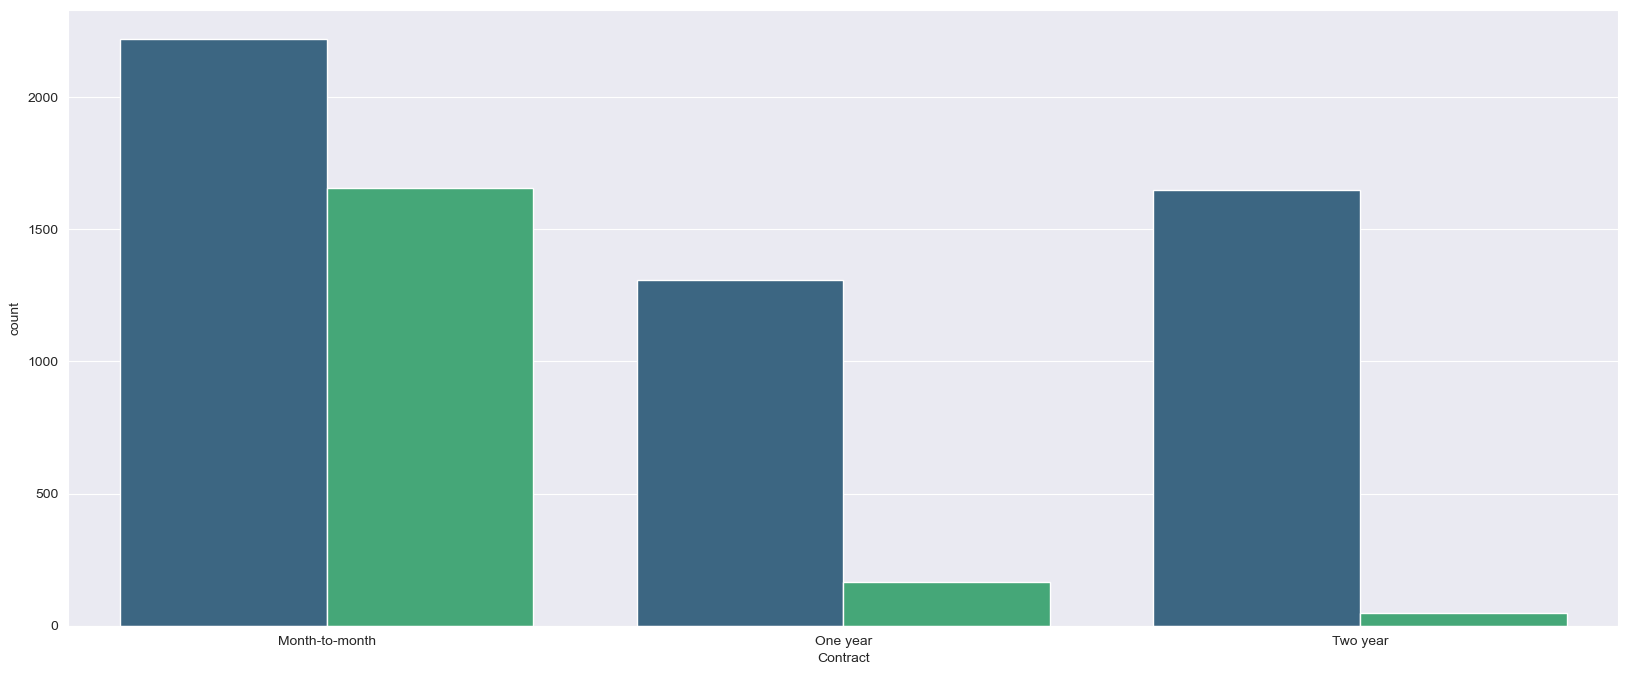

In [29]:
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x='Contract', hue='Churn', palette='viridis')


AttributeError: 'numpy.int64' object has no attribute 'startswith'

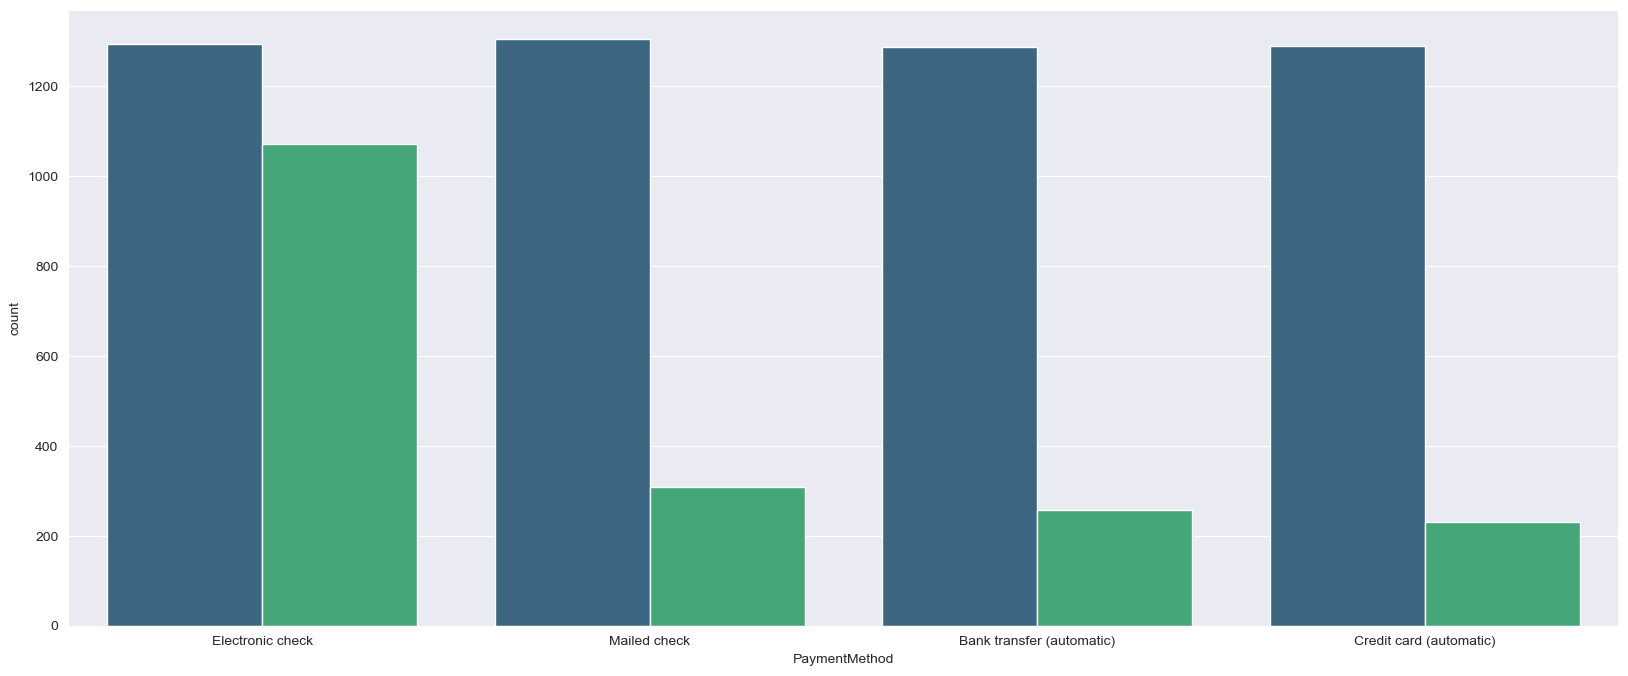

In [30]:
plt.figure(figsize=(20, 8))

sns.countplot(data=data, x='PaymentMethod', hue='Churn', palette='viridis')


AttributeError: 'numpy.int64' object has no attribute 'startswith'

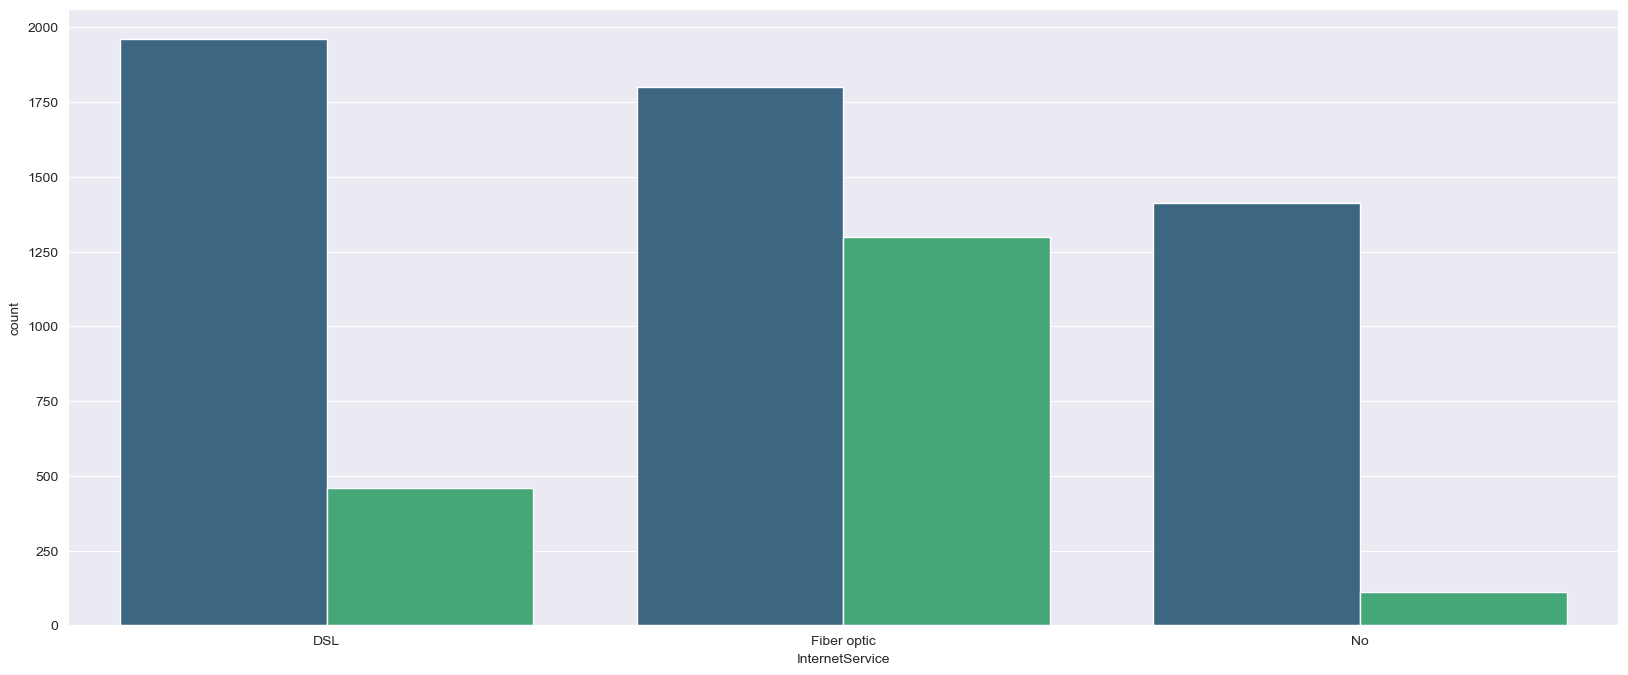

In [31]:
plt.figure(figsize=(20, 8))

sns.countplot(data=data, x='InternetService', hue='Churn', palette='viridis')


AttributeError: 'numpy.int64' object has no attribute 'startswith'

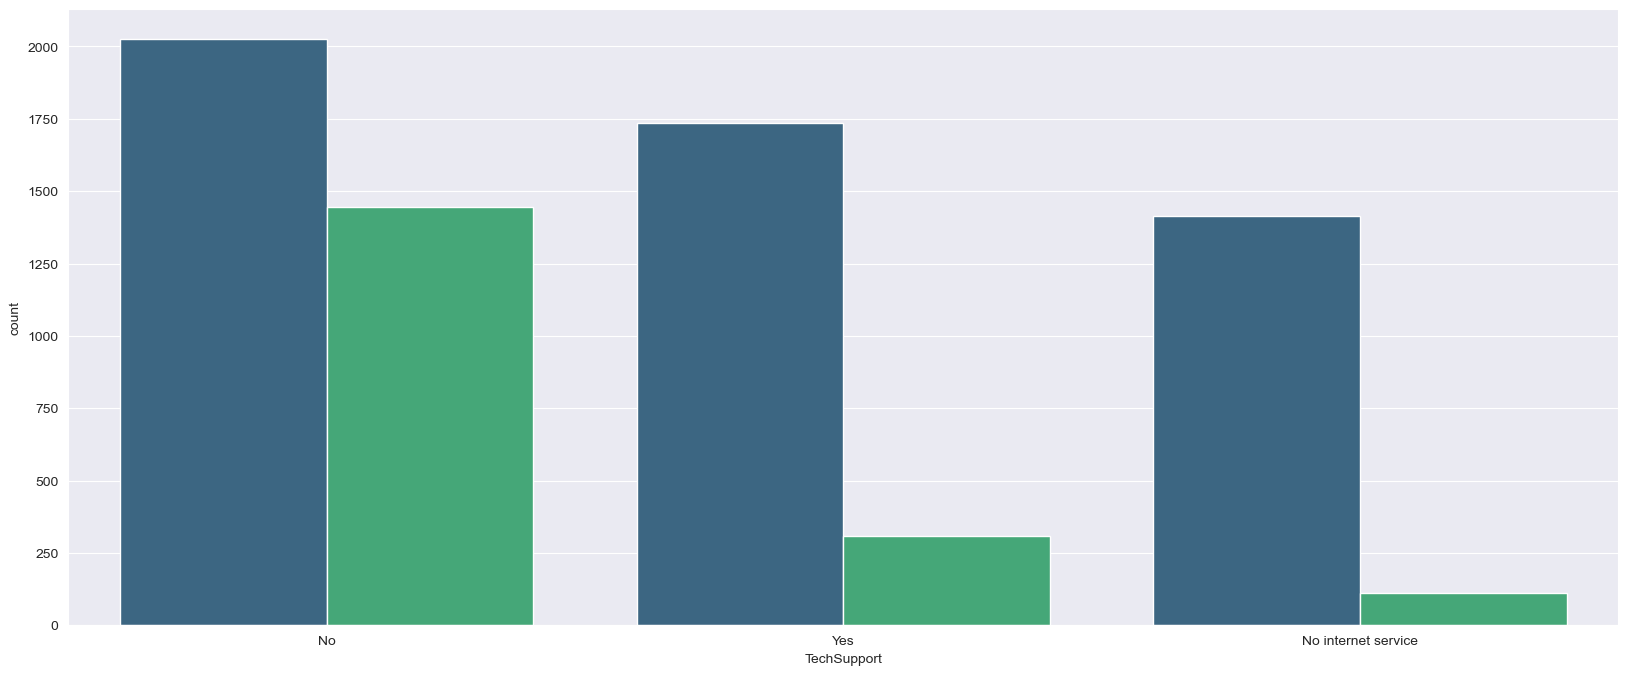

In [32]:
plt.figure(figsize=(20, 8))

sns.countplot(data=data, x='TechSupport', hue='Churn', palette='viridis')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

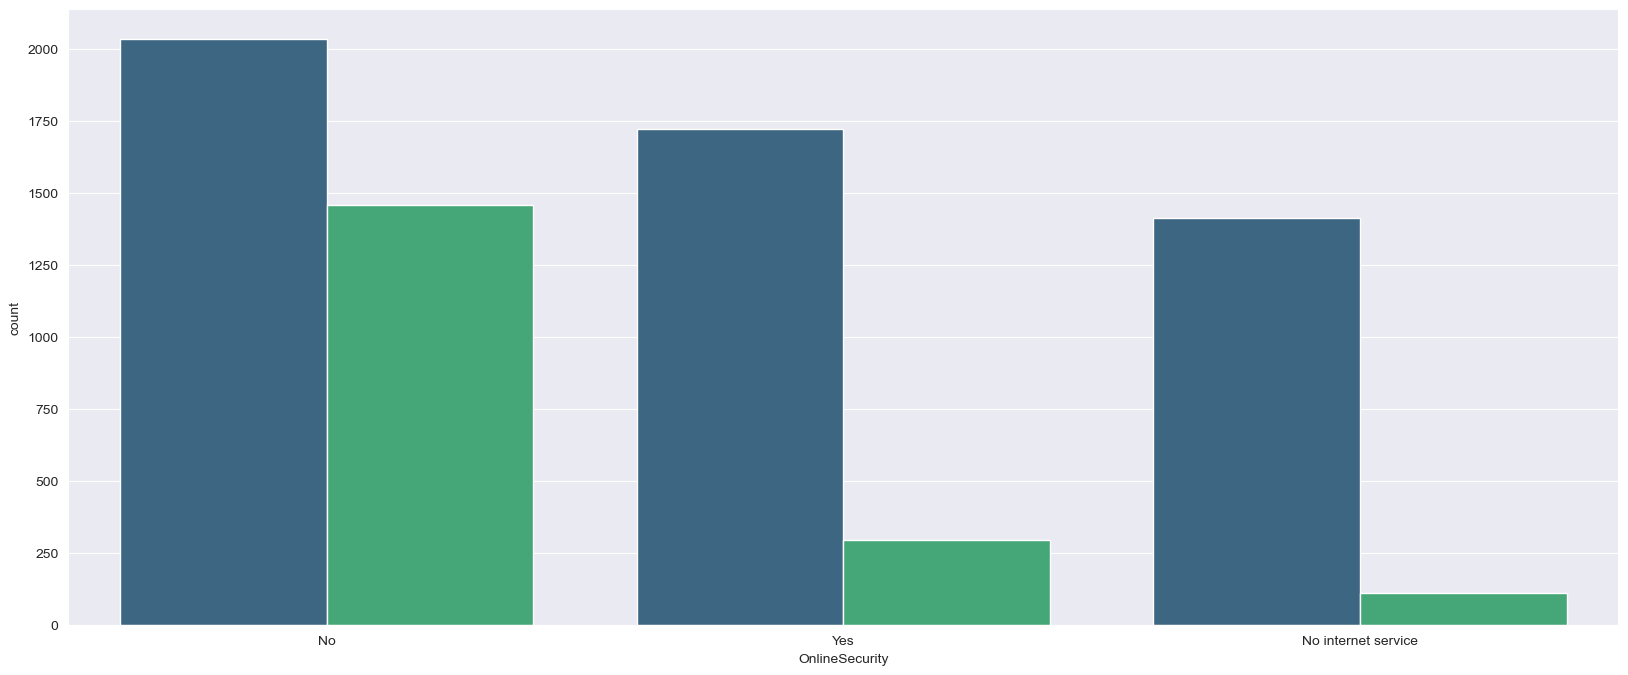

In [35]:
plt.figure(figsize=(20, 8))


sns.countplot(data=data, x='OnlineSecurity', hue='Churn', palette='viridis')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

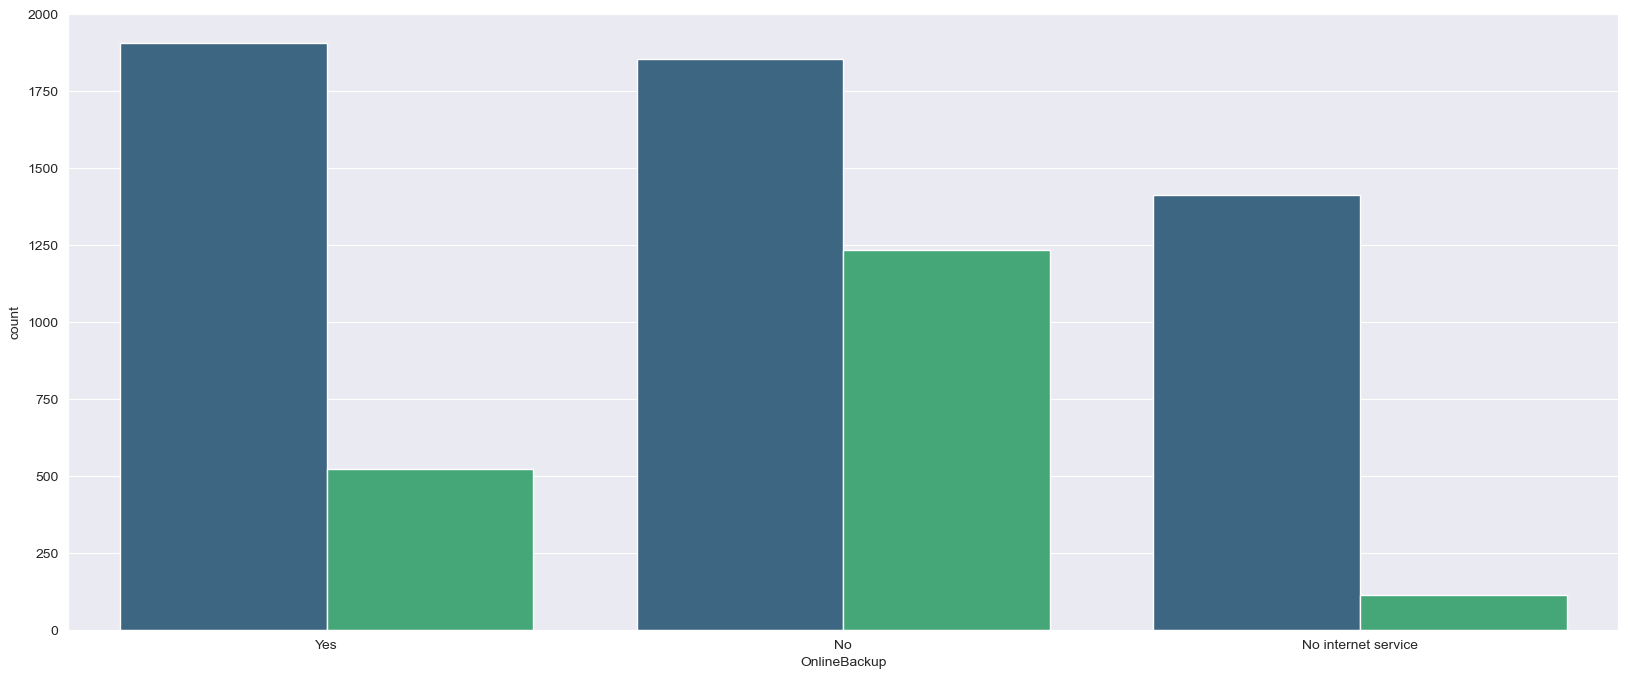

In [36]:
plt.figure(figsize=(20, 8))

sns.countplot(data=data, x='OnlineBackup', hue='Churn', palette='viridis')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

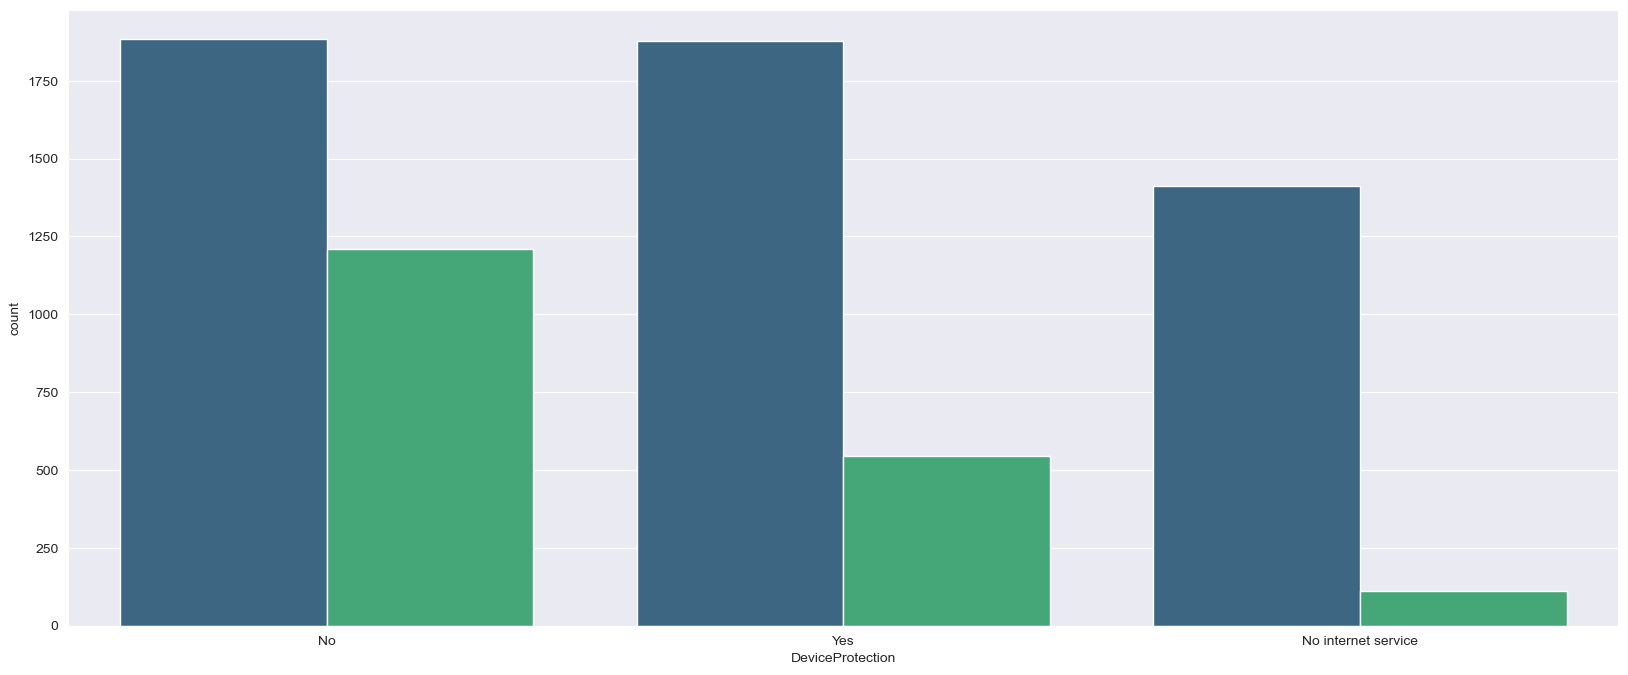

In [37]:
plt.figure(figsize=(20, 8))

sns.countplot(data=data, x='DeviceProtection', hue='Churn', palette='viridis')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

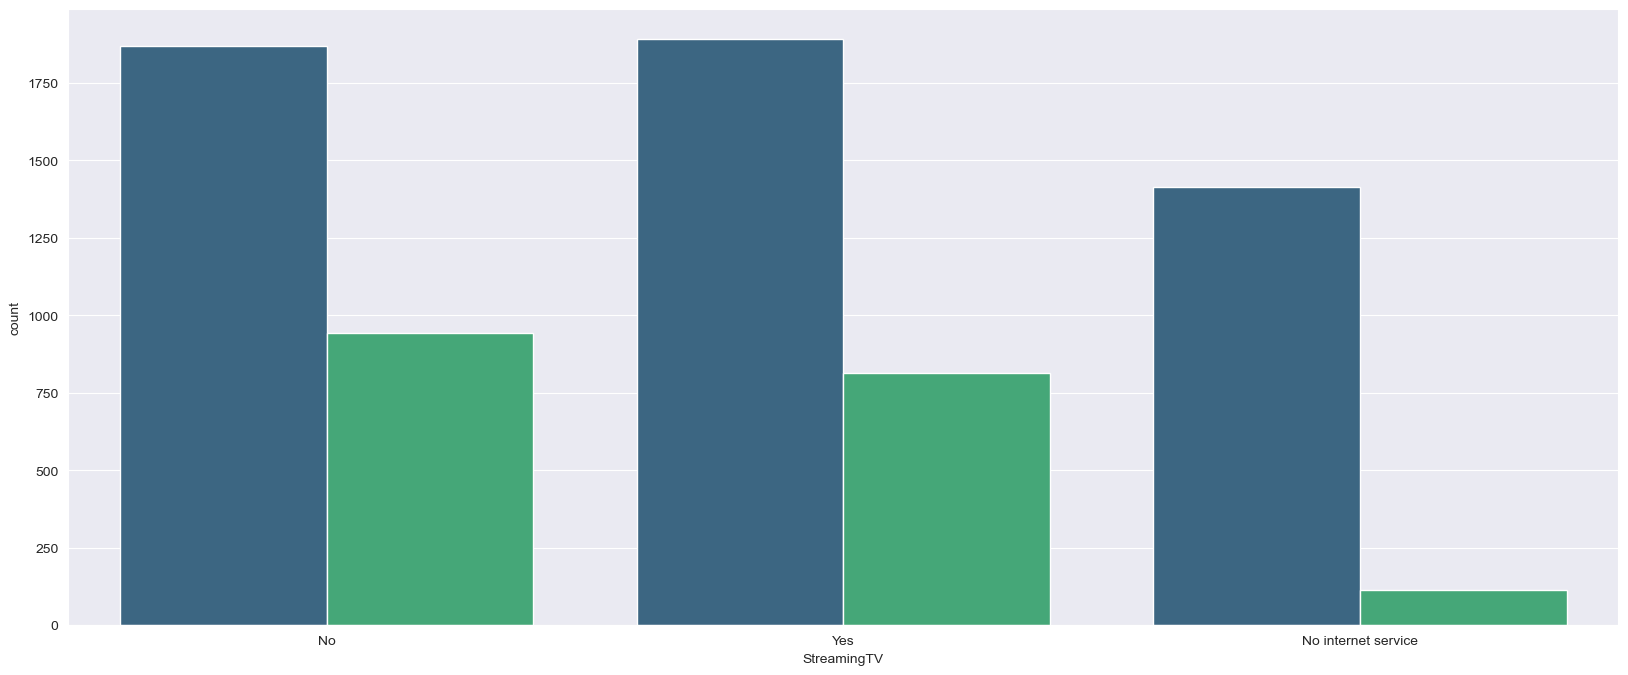

In [38]:
plt.figure(figsize=(20, 8))

sns.countplot(data=data, x='StreamingTV', hue='Churn', palette='viridis')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

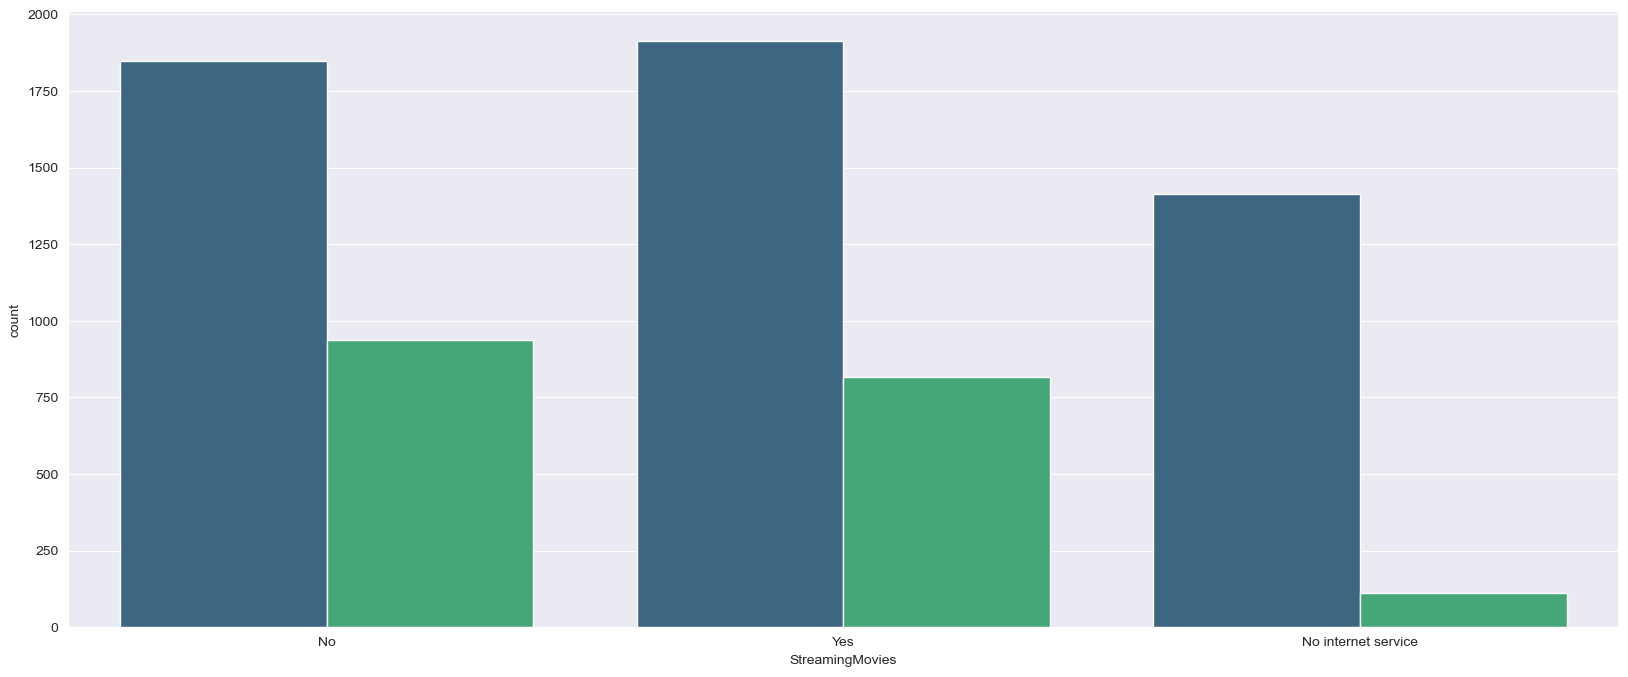

In [39]:
plt.figure(figsize=(20, 8))

sns.countplot(data=data, x='StreamingMovies', hue='Churn', palette='viridis')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

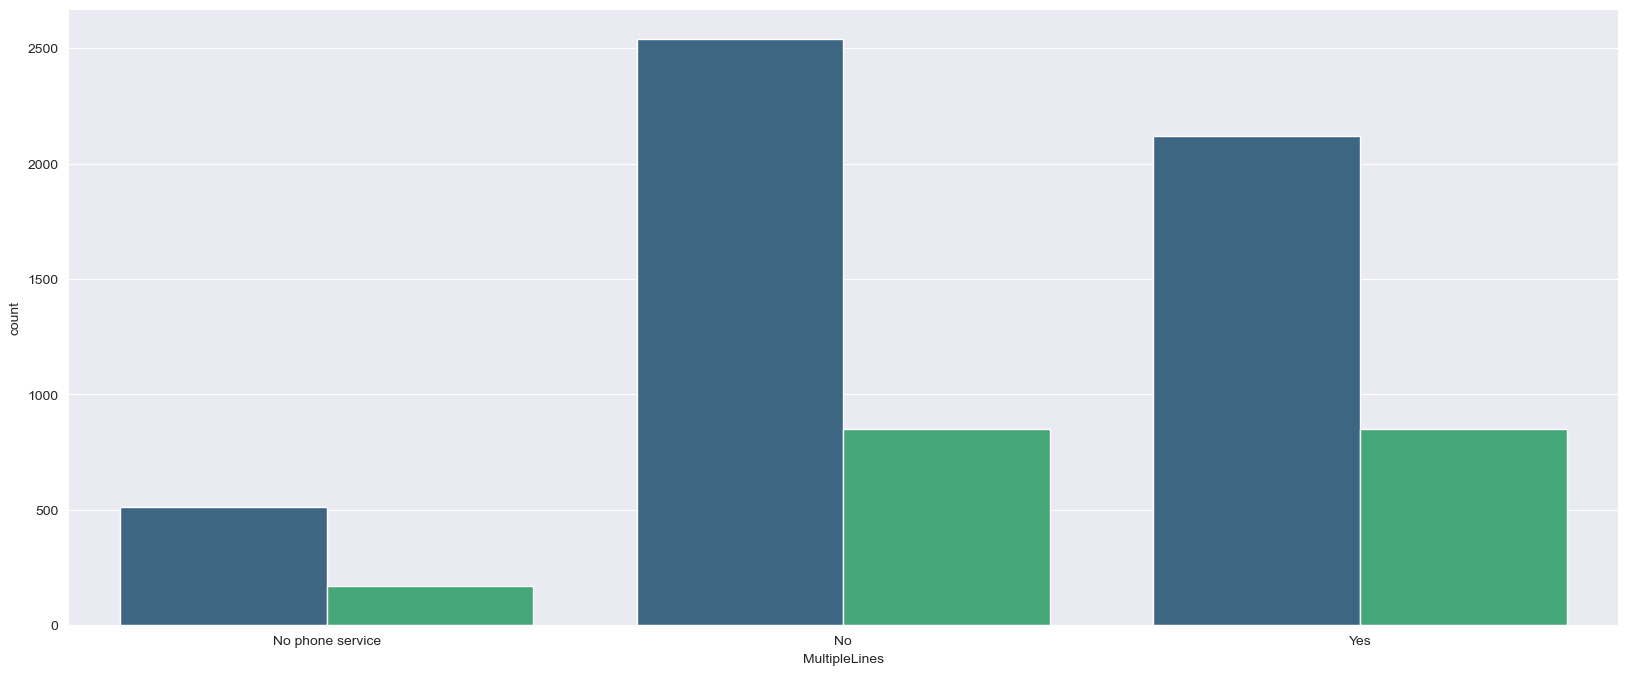

In [40]:
plt.figure(figsize=(20, 8))

sns.countplot(data=data, x='MultipleLines', hue='Churn', palette='viridis')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

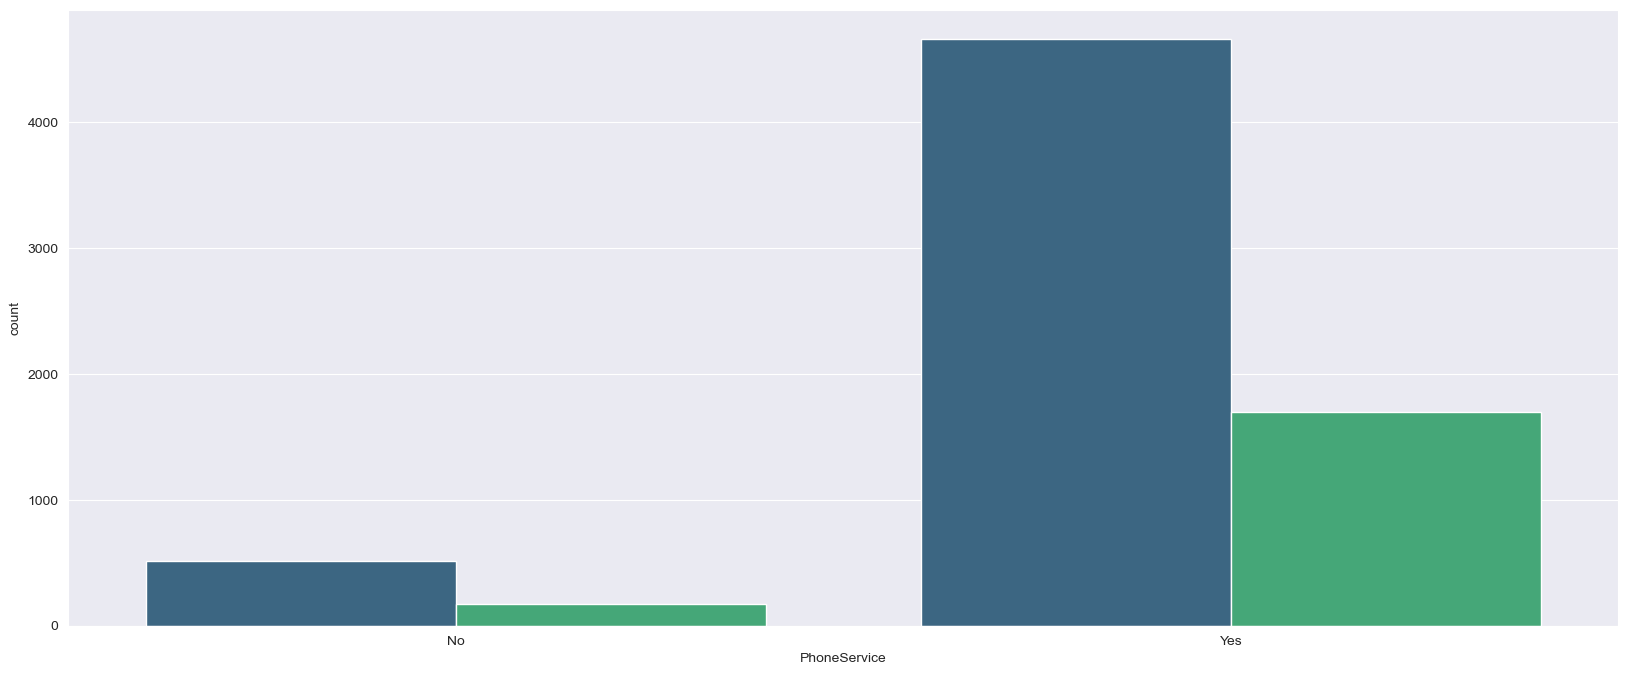

In [41]:
plt.figure(figsize=(20, 8))

sns.countplot(data=data, x='PhoneService', hue='Churn', palette='viridis')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

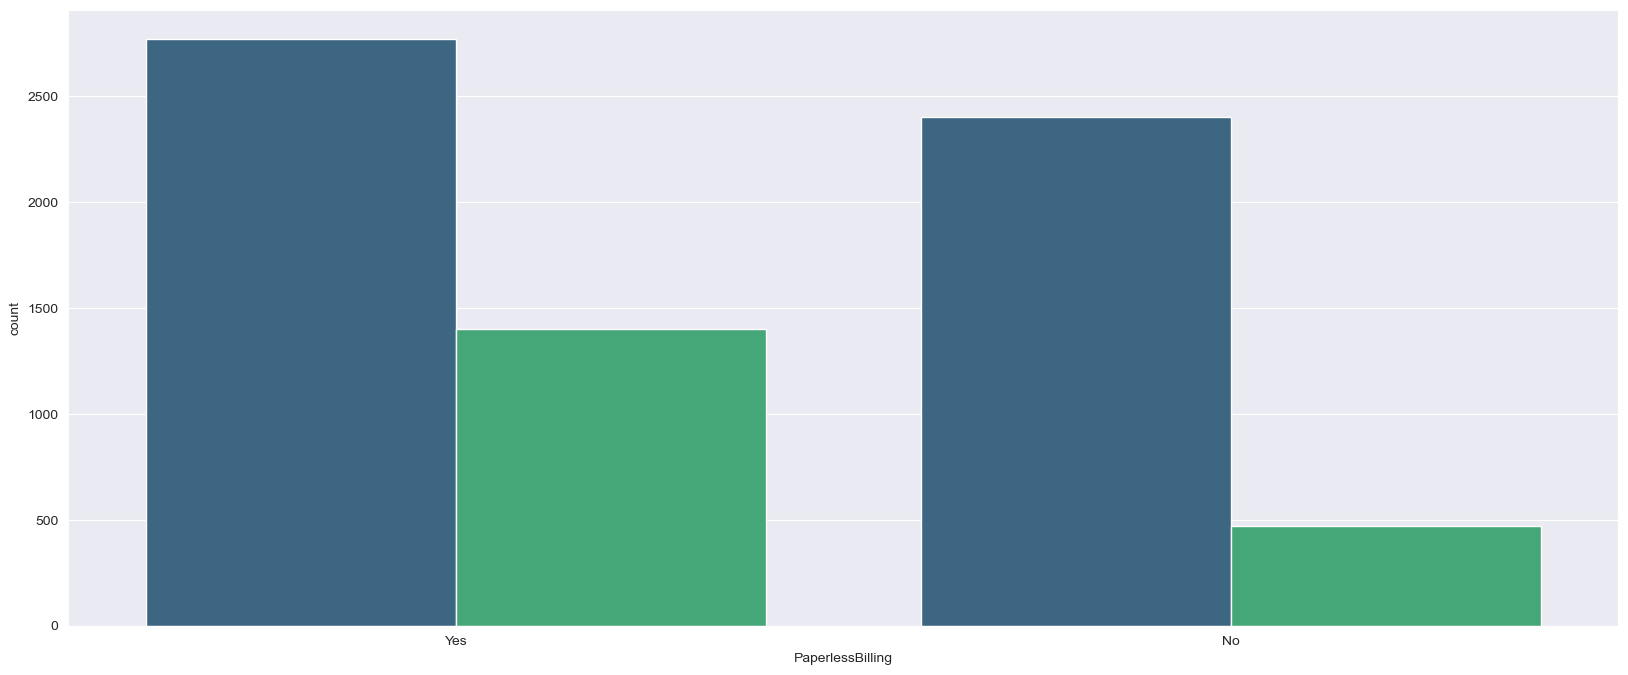

In [42]:
plt.figure(figsize=(20, 8))

sns.countplot(data=data, x='PaperlessBilling', hue='Churn', palette='viridis')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

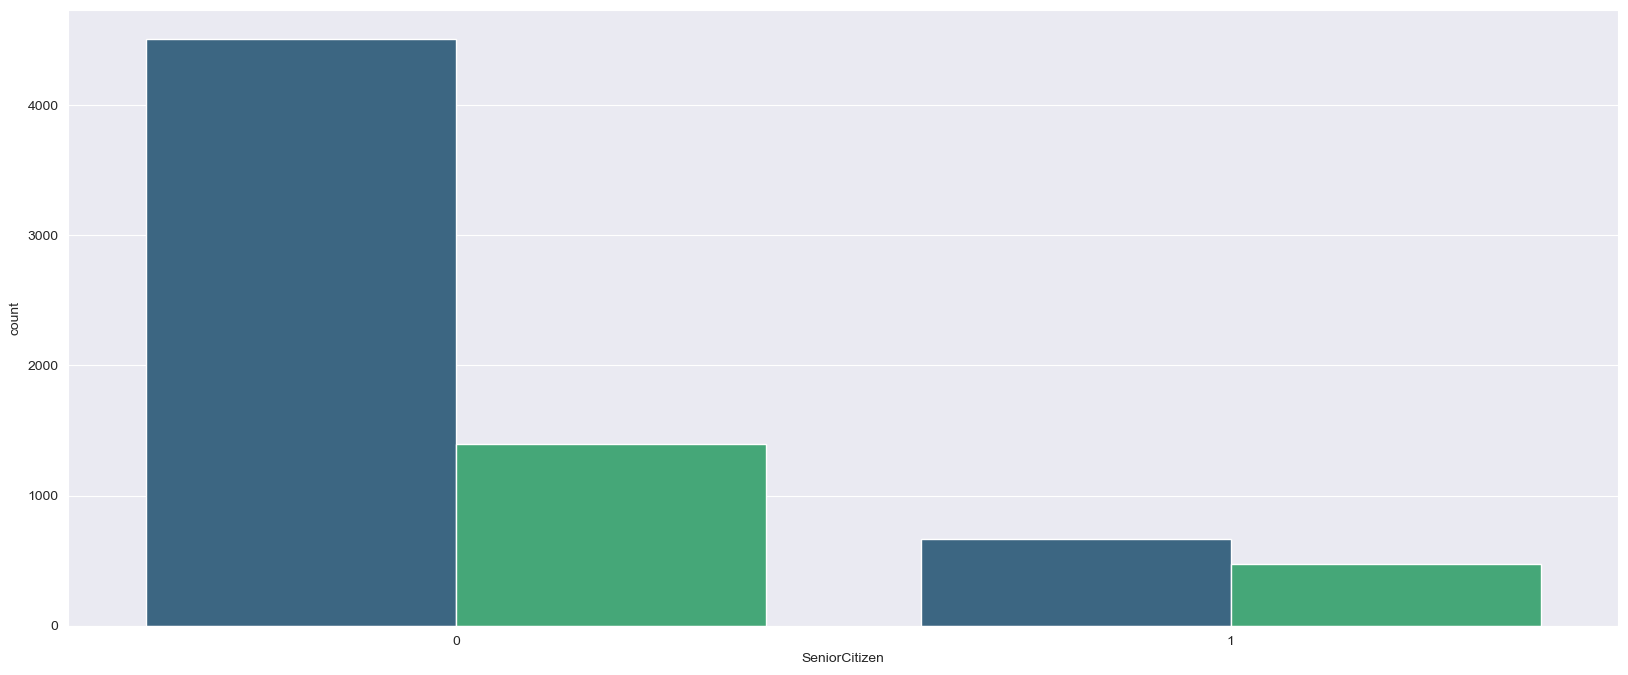

In [43]:
plt.figure(figsize=(20, 8))

sns.countplot(data=data, x='SeniorCitizen', hue='Churn', palette='viridis')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

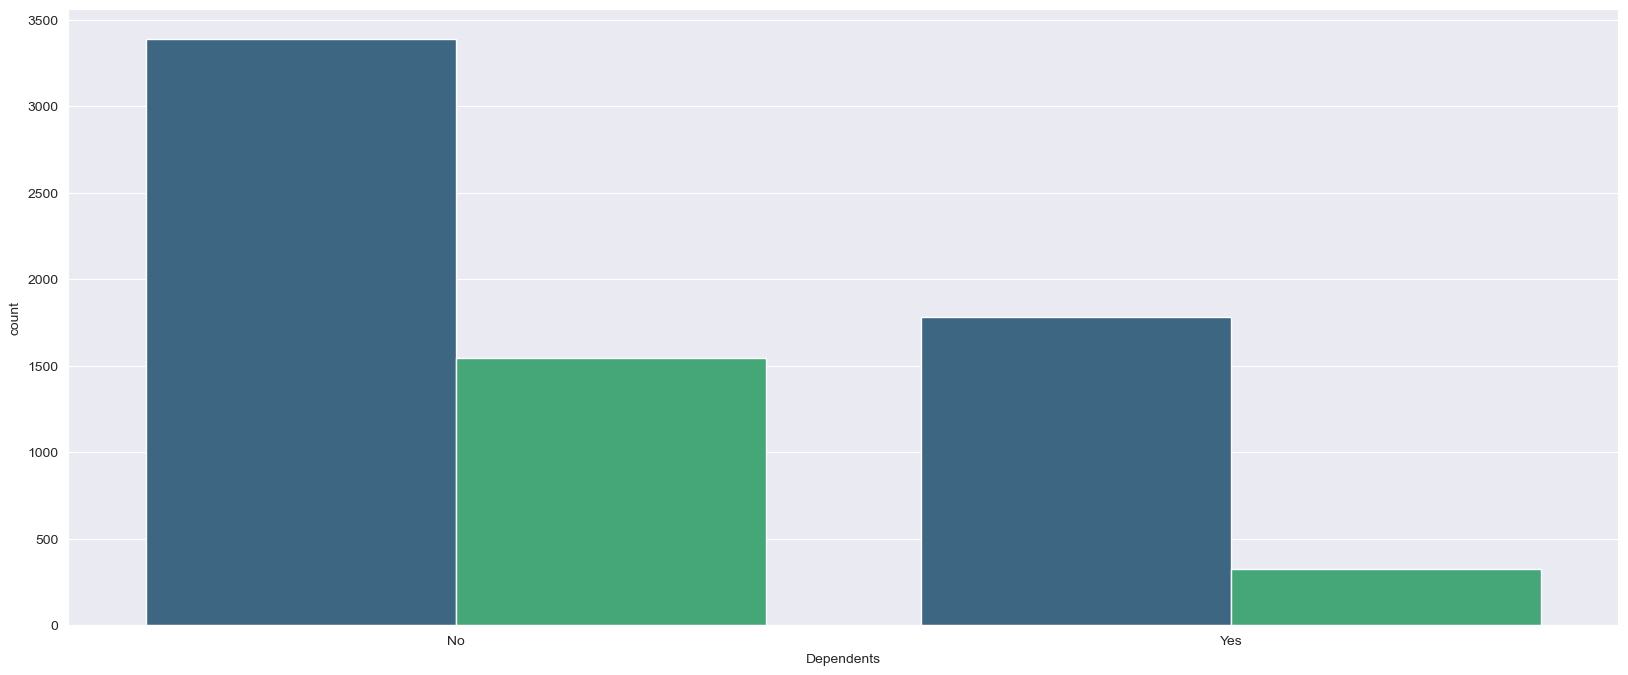

In [44]:
plt.figure(figsize=(20, 8))

sns.countplot(data=data, x='Dependents', hue='Churn', palette='viridis')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

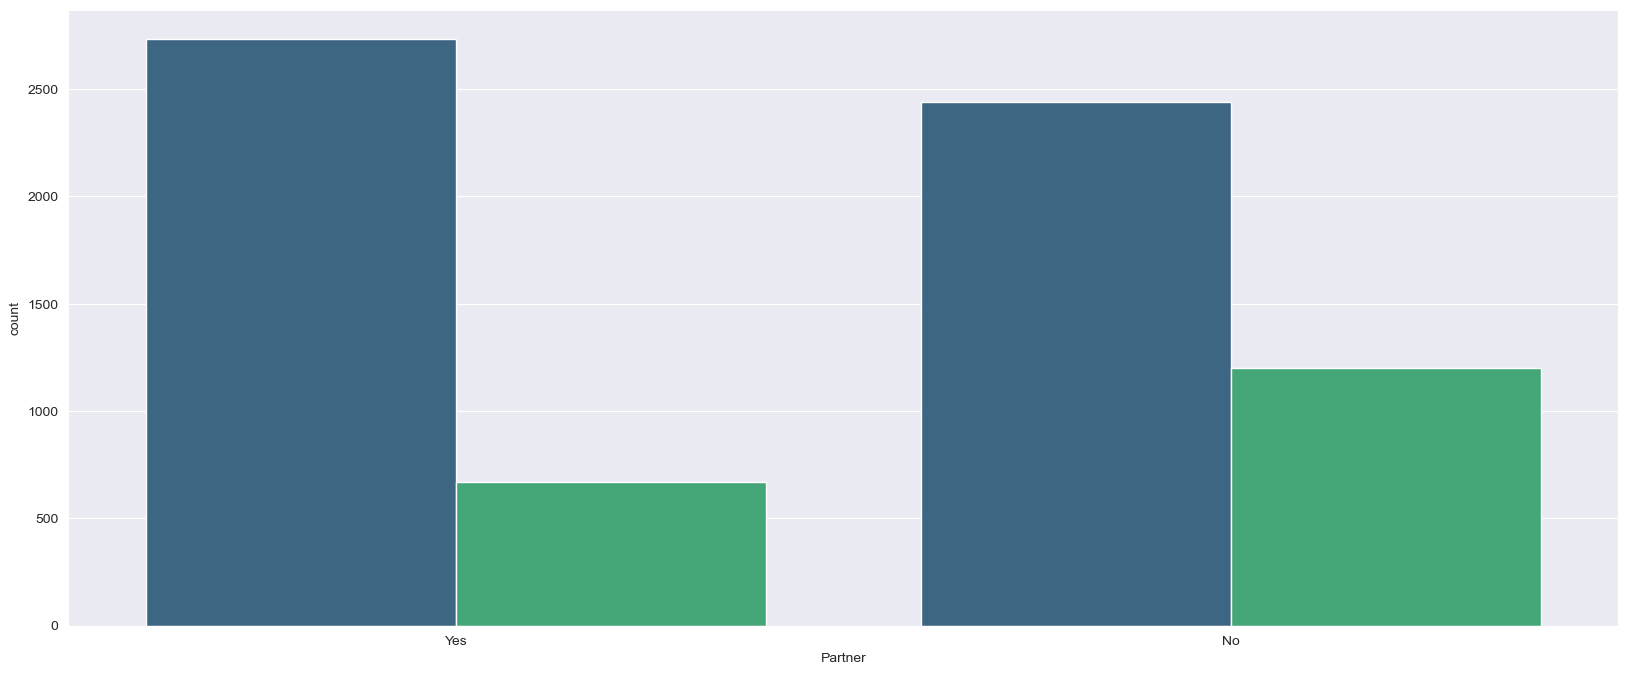

In [46]:
plt.figure(figsize=(20, 8))

sns.countplot(data=data, x='Partner', hue='Churn', palette='viridis')

In [ ]:
#Dummy Variables

data = pd.get_dummies(data, drop_first=True)

data.shape


In [ ]:
# Train Test Split

from sklearn.model_selection import train_test_split

X = data.drop(['Churn'], axis=1)

y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


In [53]:
# Model Building

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)

y_predict = rf.predict(X_test)


In [ ]:
# Model Evaluation

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print('Accuracy Score:', accuracy_score(y_test, y_predict))

print('Classification Report:', classification_report(y_test, y_predict))

print('Confusion Matrix:', confusion_matrix(y_test, y_predict))


In [ ]:
# Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num=11)]

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

rf_random.fit(X_train, y_train)

rf_random.best_params_

